In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Flight,2,5,306,6,high,M,45,3838,1
1,2,F,Ship,7,2,114,3,high,M,35,2710,1
2,3,B,Ship,7,2,215,7,medium,F,44,4152,0
3,4,A,Road,5,3,126,5,medium,M,54,2245,0
4,5,F,Ship,3,5,113,3,medium,M,43,1806,1


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4.523000,2.981000,200.316000,5.984000,31.987000,3501.413000,0.505000
std,288.819436,1.731031,1.424313,62.730178,2.574174,18.506737,1407.924646,0.500225
min,1.000000,2.000000,1.000000,90.000000,2.000000,1.000000,1005.000000,0.000000
25%,250.750000,3.000000,2.000000,146.000000,4.000000,16.000000,2271.250000,0.000000
50%,500.500000,5.000000,3.000000,202.500000,6.000000,32.000000,3544.000000,1.000000
75%,750.250000,6.000000,4.000000,254.000000,8.000000,48.000000,4683.250000,1.000000
max,1000.000000,7.000000,5.000000,309.000000,10.000000,64.000000,5988.000000,1.000000


In [5]:
print("Mean:",df['Cost_of_the_Product'].mean())
print("Median:",df['Cost_of_the_Product'].median())
print("Mode:",df['Cost_of_the_Product'].mode())

Mean: 200.316
Median: 202.5
Mode: 0    273
Name: Cost_of_the_Product, dtype: int64


In [6]:
print("Mean:",df['Weight_in_gms'].mean())
print("Median:",df['Weight_in_gms'].median())
print("Mode:",df['Weight_in_gms'].mode())

Mean: 3501.413
Median: 3544.0
Mode: 0    1722
Name: Weight_in_gms, dtype: int64


In [7]:
print("Variance:",df['Cost_of_the_Product'].var())
print("Standard Deviation:",df['Cost_of_the_Product'].std())


Variance: 3935.075219219221
Standard Deviation: 62.73017789883288


In [10]:
df.select_dtypes(include=np.number).skew()

,0
ID,0.000000
Customer_care_calls,-0.028389
Customer_rating,0.027258
Cost_of_the_Product,-0.020105
Prior_purchases,-0.016479
Discount_offered,0.035434
Weight_in_gms,-0.058986
Reached.on.Time_Y.N,-0.020031


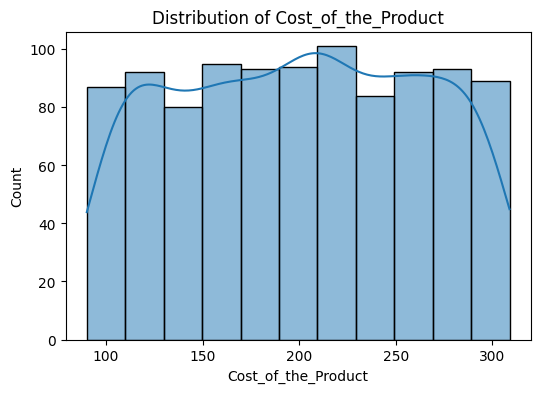

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['Cost_of_the_Product'],kde=True)
plt.title("Distribution of Cost_of_the_Product")
plt.show()

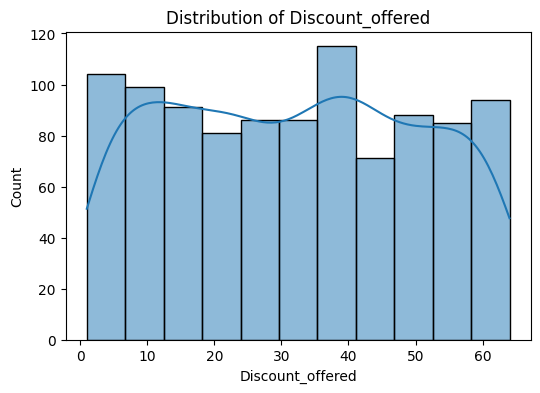

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['Discount_offered'],kde=True)
plt.title("Distribution of Discount_offered")
plt.show()

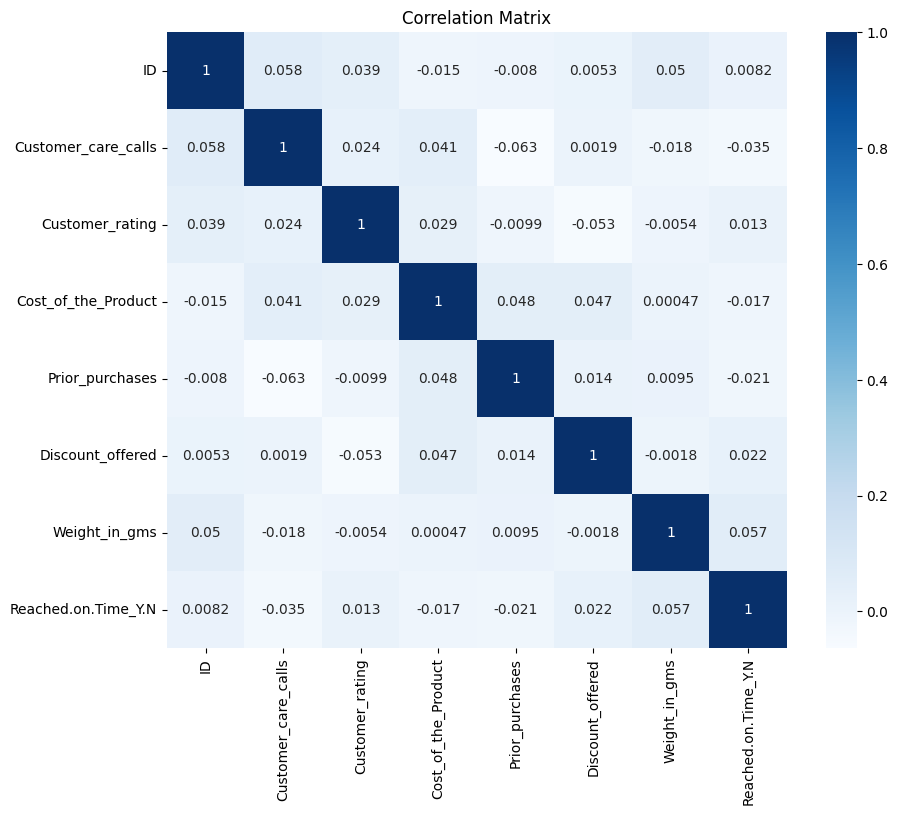

In [13]:
correlation=df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='Blues')

plt.title("Correlation Matrix")

plt.show()

In [14]:
df.groupby('Reached.on.Time_Y.N').mean(numeric_only=True)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,,
0,498.117172,4.583838,2.961616,201.361616,6.038384,31.577778,3420.385859
1,502.835644,4.463366,3.000000,199.291089,5.930693,32.388119,3580.835644


In [15]:
df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean()

,Reached.on.Time_Y.N
Mode_of_Shipment,
Flight,0.459627
Road,0.518841
Ship,0.534535


In [16]:
df.groupby('Product_importance')['Reached.on.Time_Y.N'].mean()

,Reached.on.Time_Y.N
Product_importance,
high,0.531056
low,0.509915
medium,0.473846
